## **ACERCA DEL DATASET**

In [70]:
#Importando las librerias para el EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df=pd.read_csv(r"E:\FONDO TALENTO DIGITAL\Portafolio_GITHUB\Diabetes\diabetes.csv")
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [72]:
df.shape
print(f"El Dataset contiene: {df.shape[0]} filas")
print(f"El Dataset contiene: {df.shape[1]} columnas")

El Dataset contiene: 768 filas
El Dataset contiene: 9 columnas


In [73]:
df.duplicated().sum()

0

*De acuerdo a la celda anterior observamos que nuestro dataset no contiene filas duplicadas, por lo cual inferimos que tenemos filas unicas.*

In [74]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

*Observamos que nuestro Dataset no posee valores nulos en cada columna*

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


La informacion que nos brinda el Dataset sobre diabetes es la siguiente:

◘ *El Dataset contiene 768 filas no nulas y 9 columnas o caracteristicas*

◘ *Observamos dentro del dataset unicamente columnas numericas, 
en este caso tenemos 7 caracteristicas numericas del tipo entero(int64) y 2 caracteristicas del tipo flotante (float64)*

◘ *La columna Outcome es la variable objetivo (Target)*

## **ANALISIS EXPLORATORIO DE LOS DATOS**

In [76]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

*Para poder entender mejor el desarrollo de nuestro EDA realizaremos un renombre de las columnas al español*

In [77]:
df.rename(columns={'Pregnancies':'Embarazos',
                   'Glucose':'Glucosa',
                   'BloodPressure':'PresionSanguinea',
                   'SkinThickness':'GrosorDePiel',
                   'Insulin':'Insulina',
                   'BMI':'IndiceMasaCorporal',
                   'DiabetesPedigreeFunction':'FuncionPedigriDiabetes',
                   'Age':'Edad',
                   'Outcome':'Resultado'}, inplace=True)

In [78]:
df.columns

Index(['Embarazos', 'Glucosa', 'PresionSanguinea', 'GrosorDePiel', 'Insulina',
       'IndiceMasaCorporal', 'FuncionPedigriDiabetes', 'Edad', 'Resultado'],
      dtype='object')

#### **ANALISIS DE LA VARIABLE OBJETIVO (TARGET)-RESULTADO**

In [79]:
df['Resultado'].value_counts()

Resultado
0    500
1    268
Name: count, dtype: int64

In [80]:
df['Resultado'].value_counts()*100/len(df)

Resultado
0    65.104167
1    34.895833
Name: count, dtype: float64

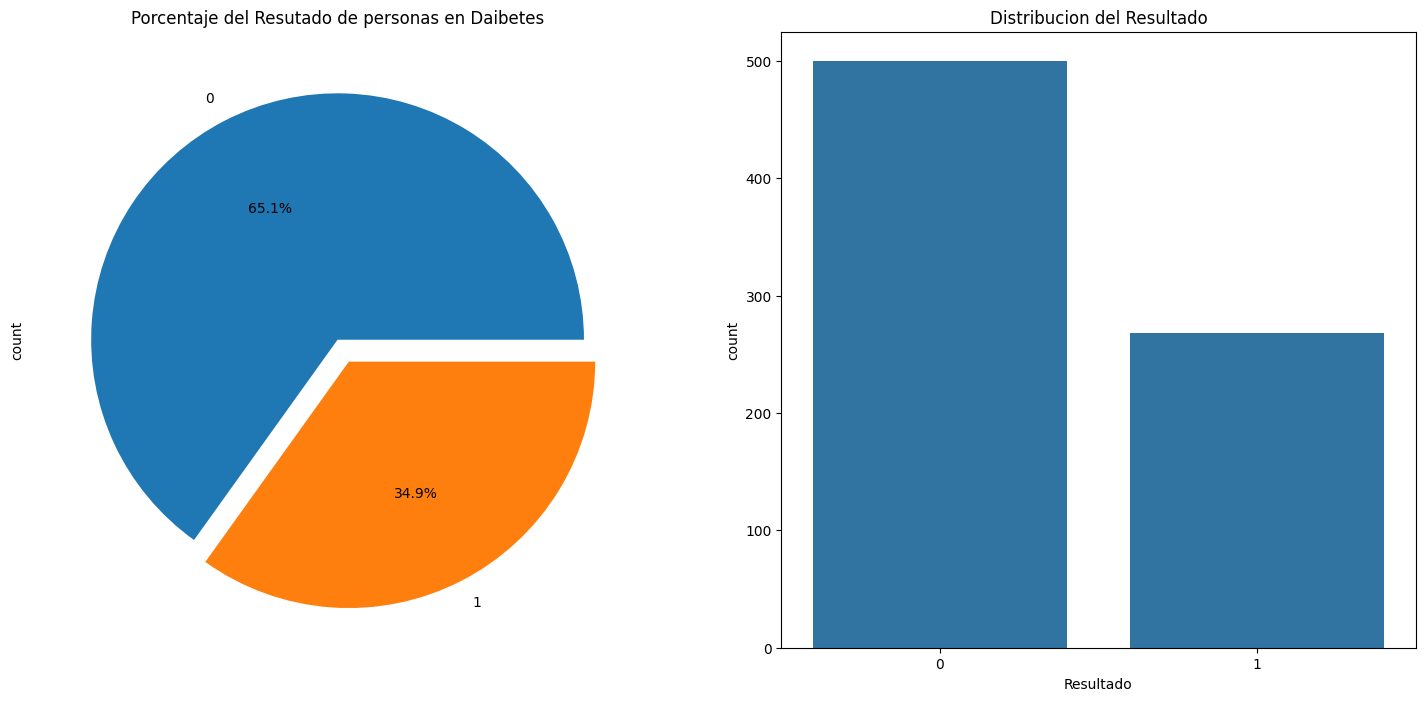

In [81]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Resultado'].value_counts().plot.pie(explode=[0,0.1], autopct="%1.1f%%",ax=ax[0],shadow=False)
ax[0].set_title("Porcentaje del Resutado de personas en Daibetes")
sns.countplot(x='Resultado',data=df,ax=ax[1])
ax[1].set_title("Distribucion del Resultado")
plt.show()


*Por medio de estos graficos observamos que la poblacion que no posee diabetes es superior a la poblacion que si lo posee asi mismo la poblacion libre de diabetes posee mayor catidad de personas en este caso de 500 personas libres de diabetes y las que no poseen diabetes solo llegan a 268*

#### **ANALISIS ESTADISTICO**

In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Embarazos,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucosa,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
PresionSanguinea,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
GrosorDePiel,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulina,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
IndiceMasaCorporal,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
FuncionPedigriDiabetes,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Edad,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Resultado,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


*Observando la informacion estadistica podemos inferir que existen valores atipicos como se observa los ceros presentes en la columnas asi mismo tambien observamos valores atipícos dentro de la columna embarazos, como se observa el valor maximo de 17 embarazos. En base a esto se decide a realizar una anlisis más exhaustivo de cada columna.*

In [83]:
num_columns = df.select_dtypes(include=['int64','float64'])
for col in num_columns:
    print(f"Valores unicos para la columna '{col}':")
    print(df[col].unique())

Valores unicos para la columna 'Embarazos':
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Valores unicos para la columna 'Glucosa':
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
Valores unicos para la columna 'PresionSanguinea':
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
Valores unicos para la columna 'GrosorDePiel':
[35 29  0 23 32 45

*En base a que la informacion anterior no nos brinda una informacion adecuada de los valores presentes dentro del Dataset de Diabetes procedemos a realizar un grafico de distribucion de todas las columnas numericas¨.*

array([[<Axes: title={'center': 'Embarazos'}>,
        <Axes: title={'center': 'Glucosa'}>,
        <Axes: title={'center': 'PresionSanguinea'}>],
       [<Axes: title={'center': 'GrosorDePiel'}>,
        <Axes: title={'center': 'Insulina'}>,
        <Axes: title={'center': 'IndiceMasaCorporal'}>],
       [<Axes: title={'center': 'FuncionPedigriDiabetes'}>,
        <Axes: title={'center': 'Edad'}>,
        <Axes: title={'center': 'Resultado'}>]], dtype=object)

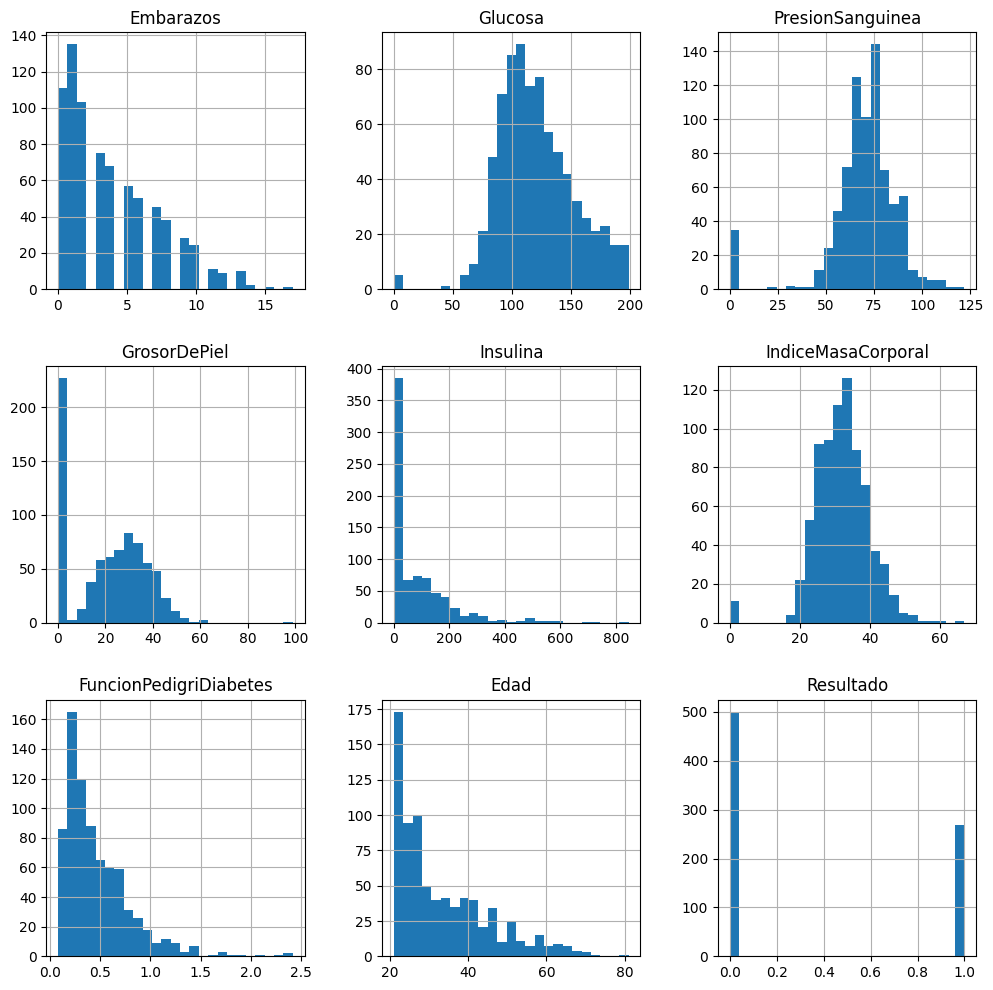

In [84]:
df.hist(bins=25,figsize=(12,12), xlabelsize="10",ylabelsize="10")

*Observamos que no existe una distribucion normal de los datos y que tenemos sesgo en muchas columnas como es el caso de la columna Embarazos, Grosor de piel, Insulina, FuncionPedigriDiabetes, y en la edad, para lo cual realizaremos un mapa de calor para poder conocer como es la correlacion de las variables independientes con el target y de esta manera poder tomar la mejor decision con los valores cero que existen en el Dataset*

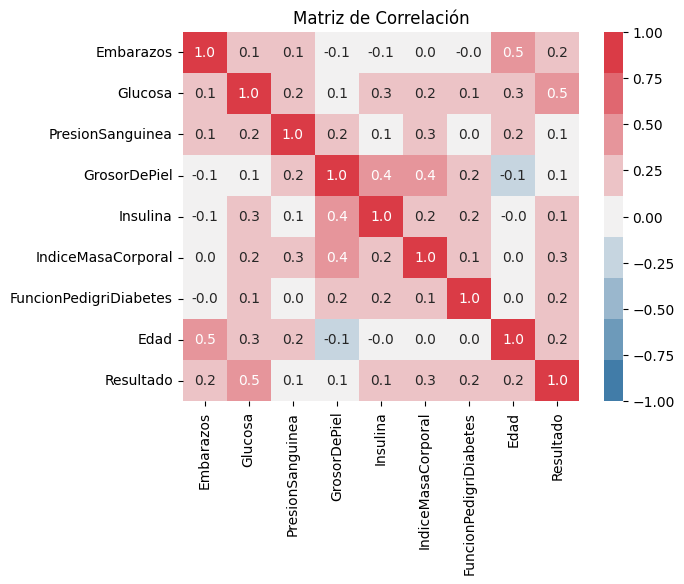

In [85]:
sns.heatmap(df.corr(),cmap=sns.diverging_palette(240,10,n=9),annot=True,fmt='.1f',vmin=-1,vmax=1)
plt.title("Matriz de Correlación")
plt.show()

*En base al mapa de calor inferimos que las que las columnas que poseen mayor correlacion con la columna resultado del diabetes son las de Glucosa representando un 50 % de correlacion positiva, con el resultado, pero por otro lado otra columna con una correlacion significativa tambien vendria a ser la de IndiceMasaCorporal con un 305 de correlacion, es por esto que estas columnas seran de principal analisis, por otro lado las columnas de Embarazos, Insulina, FuncionPedigriDiabetes y Edad tambien representa una correlacion positiva del 20 %, ahora por otro lado las columnas que no representan correlacion significativa con el resusltado son las de Presion Sanguinea y el Grosor de Piel, es por eso que ser fundamental realizar un analisis de cada caracteristica.*

*En conclusion observamos que los valores de cero presentes en las columnas nos arrojan error por lo cual es adecuado reemplazar estos valores de cero por vacios y darles un mejor estudio, ya que por ejemplo en la columna de presion Sanguinea el valor minimo es de 0 yu esto no es adecuado porque el paciente deberia de estar muerto para representar ese valor, es por esto que se procede a reemplazar los valores de cero por vacios.*

In [86]:
df.columns

Index(['Embarazos', 'Glucosa', 'PresionSanguinea', 'GrosorDePiel', 'Insulina',
       'IndiceMasaCorporal', 'FuncionPedigriDiabetes', 'Edad', 'Resultado'],
      dtype='object')

In [87]:
df[['Embarazos', 'Glucosa', 'PresionSanguinea', 'GrosorDePiel', 'Insulina',
       'IndiceMasaCorporal', 'FuncionPedigriDiabetes', 'Edad']]=df[['Embarazos', 'Glucosa', 'PresionSanguinea', 'GrosorDePiel', 'Insulina',
       'IndiceMasaCorporal', 'FuncionPedigriDiabetes', 'Edad']].replace(0,np.NaN)

#### **TRATAMIENTO DE VALORES NULOS**

In [88]:
df.isna().sum()

Embarazos                 111
Glucosa                     5
PresionSanguinea           35
GrosorDePiel              227
Insulina                  374
IndiceMasaCorporal         11
FuncionPedigriDiabetes      0
Edad                        0
Resultado                   0
dtype: int64

In [89]:
df['Embarazos']=df['Embarazos'].fillna(df['Embarazos'].mean())
df['Glucosa']=df['Glucosa'].fillna(df['Glucosa'].mean())
df['PresionSanguinea']=df['PresionSanguinea'].fillna(df['PresionSanguinea'].mean())
df['GrosorDePiel']=df['GrosorDePiel'].fillna(df['GrosorDePiel'].mean())
df['Insulina']=df['Insulina'].fillna(df['Insulina'].mean())
df['IndiceMasaCorporal']=df['IndiceMasaCorporal'].fillna(df['IndiceMasaCorporal'].mean())


In [90]:
df.isna().sum()

Embarazos                 0
Glucosa                   0
PresionSanguinea          0
GrosorDePiel              0
Insulina                  0
IndiceMasaCorporal        0
FuncionPedigriDiabetes    0
Edad                      0
Resultado                 0
dtype: int64

#### **ANALISIS DE VALORES ATIPICOS U OUTLIERS**

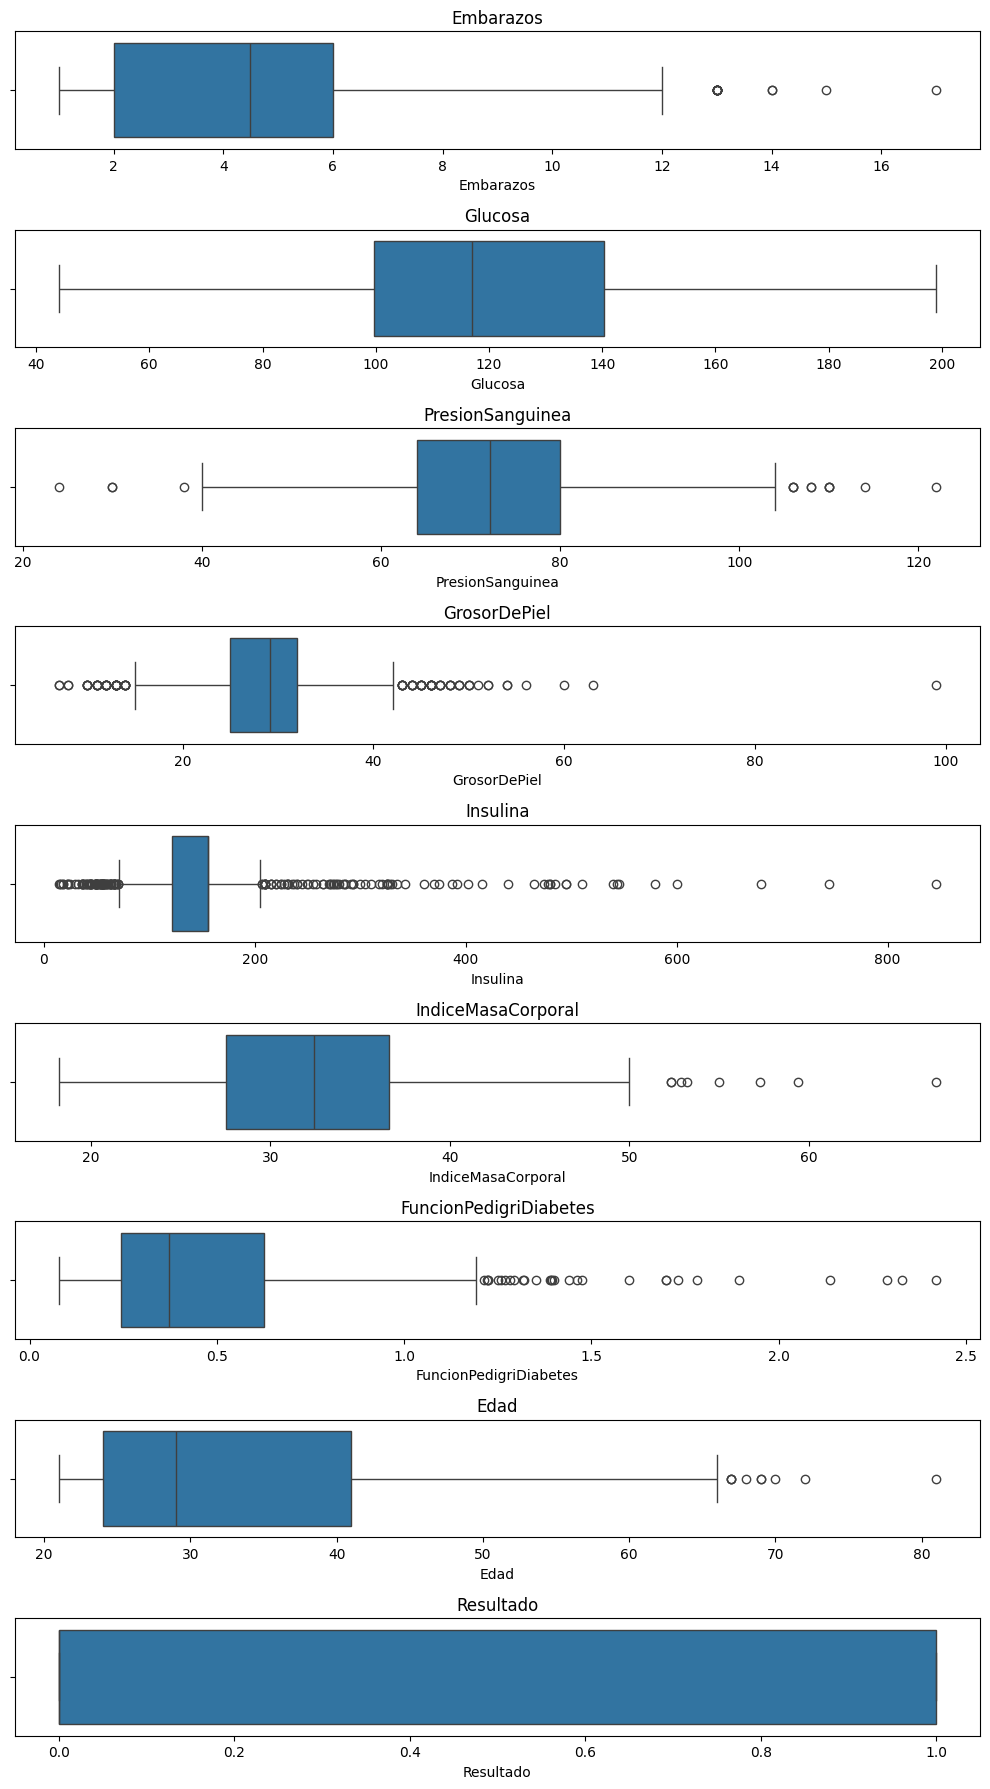

In [91]:
df_numerico =df.select_dtypes(include="number")
num_columns = df.select_dtypes(include=["int64","float64"]).columns
fig,axes =plt.subplots(nrows=len(num_columns),figsize=(10,2*len(num_columns)))
for i,col in enumerate(num_columns):
    sns.boxplot(x=df_numerico[col],ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

*En base al grafico de Boxplot observamos que existen muchos valores atipicos y que tambien la distribucion intercuartilica no esta dentro de los rangos adecuados para lo cual se evaluara cada columna por separado*

In [92]:
df.columns

Index(['Embarazos', 'Glucosa', 'PresionSanguinea', 'GrosorDePiel', 'Insulina',
       'IndiceMasaCorporal', 'FuncionPedigriDiabetes', 'Edad', 'Resultado'],
      dtype='object')

##### **ANALISIS DE LA COLUMNA EMBARAZOS**

<Axes: xlabel='Embarazos'>

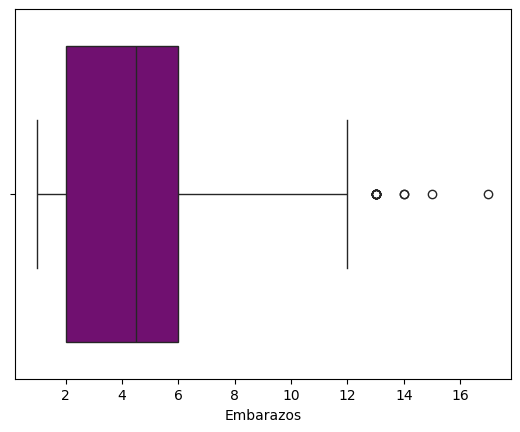

In [93]:
sns.boxplot(x=df['Embarazos'], color="purple")

In [94]:
df[df['Embarazos']>12.5]

,Embarazos,Glucosa,PresionSanguinea,GrosorDePiel,Insulina,IndiceMasaCorporal,FuncionPedigriDiabetes,Edad,Resultado
28,13.0,145.0,82.000000,19.00000,110.000000,22.2,0.245,57,0
72,13.0,126.0,90.000000,29.15342,155.548223,43.4,0.583,42,1
86,13.0,106.0,72.000000,54.00000,155.548223,36.6,0.178,45,0
88,15.0,136.0,70.000000,32.00000,110.000000,37.1,0.153,43,1
159,17.0,163.0,72.000000,41.00000,114.000000,40.9,0.817,47,1
274,13.0,106.0,70.000000,29.15342,155.548223,34.2,0.251,52,0
298,14.0,100.0,78.000000,25.00000,184.000000,36.6,0.412,46,1
323,13.0,152.0,90.000000,33.00000,29.000000,26.8,0.731,43,1
357,13.0,129.0,72.405184,30.00000,155.548223,39.9,0.569,44,1
455,14.0,175.0,62.000000,30.00000,155.548223,33.6,0.212,38,1


In [95]:
df.shape

(768, 9)